<a href="https://colab.research.google.com/github/rogerioag/openmp.info/blob/master/diretivas_radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráfico de Radar para diretivas presentes nos _benchmarks_ 

[Exemplo do matplotlib](https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html#sphx-glr-gallery-specialty-plots-radar-chart-py)

In [ ]:
from random import seed
from random import randint
# seed random number generator
seed(1)
# generate some integers
for _ in range(110):
	value = randint(0, 20)
	print(value,',')

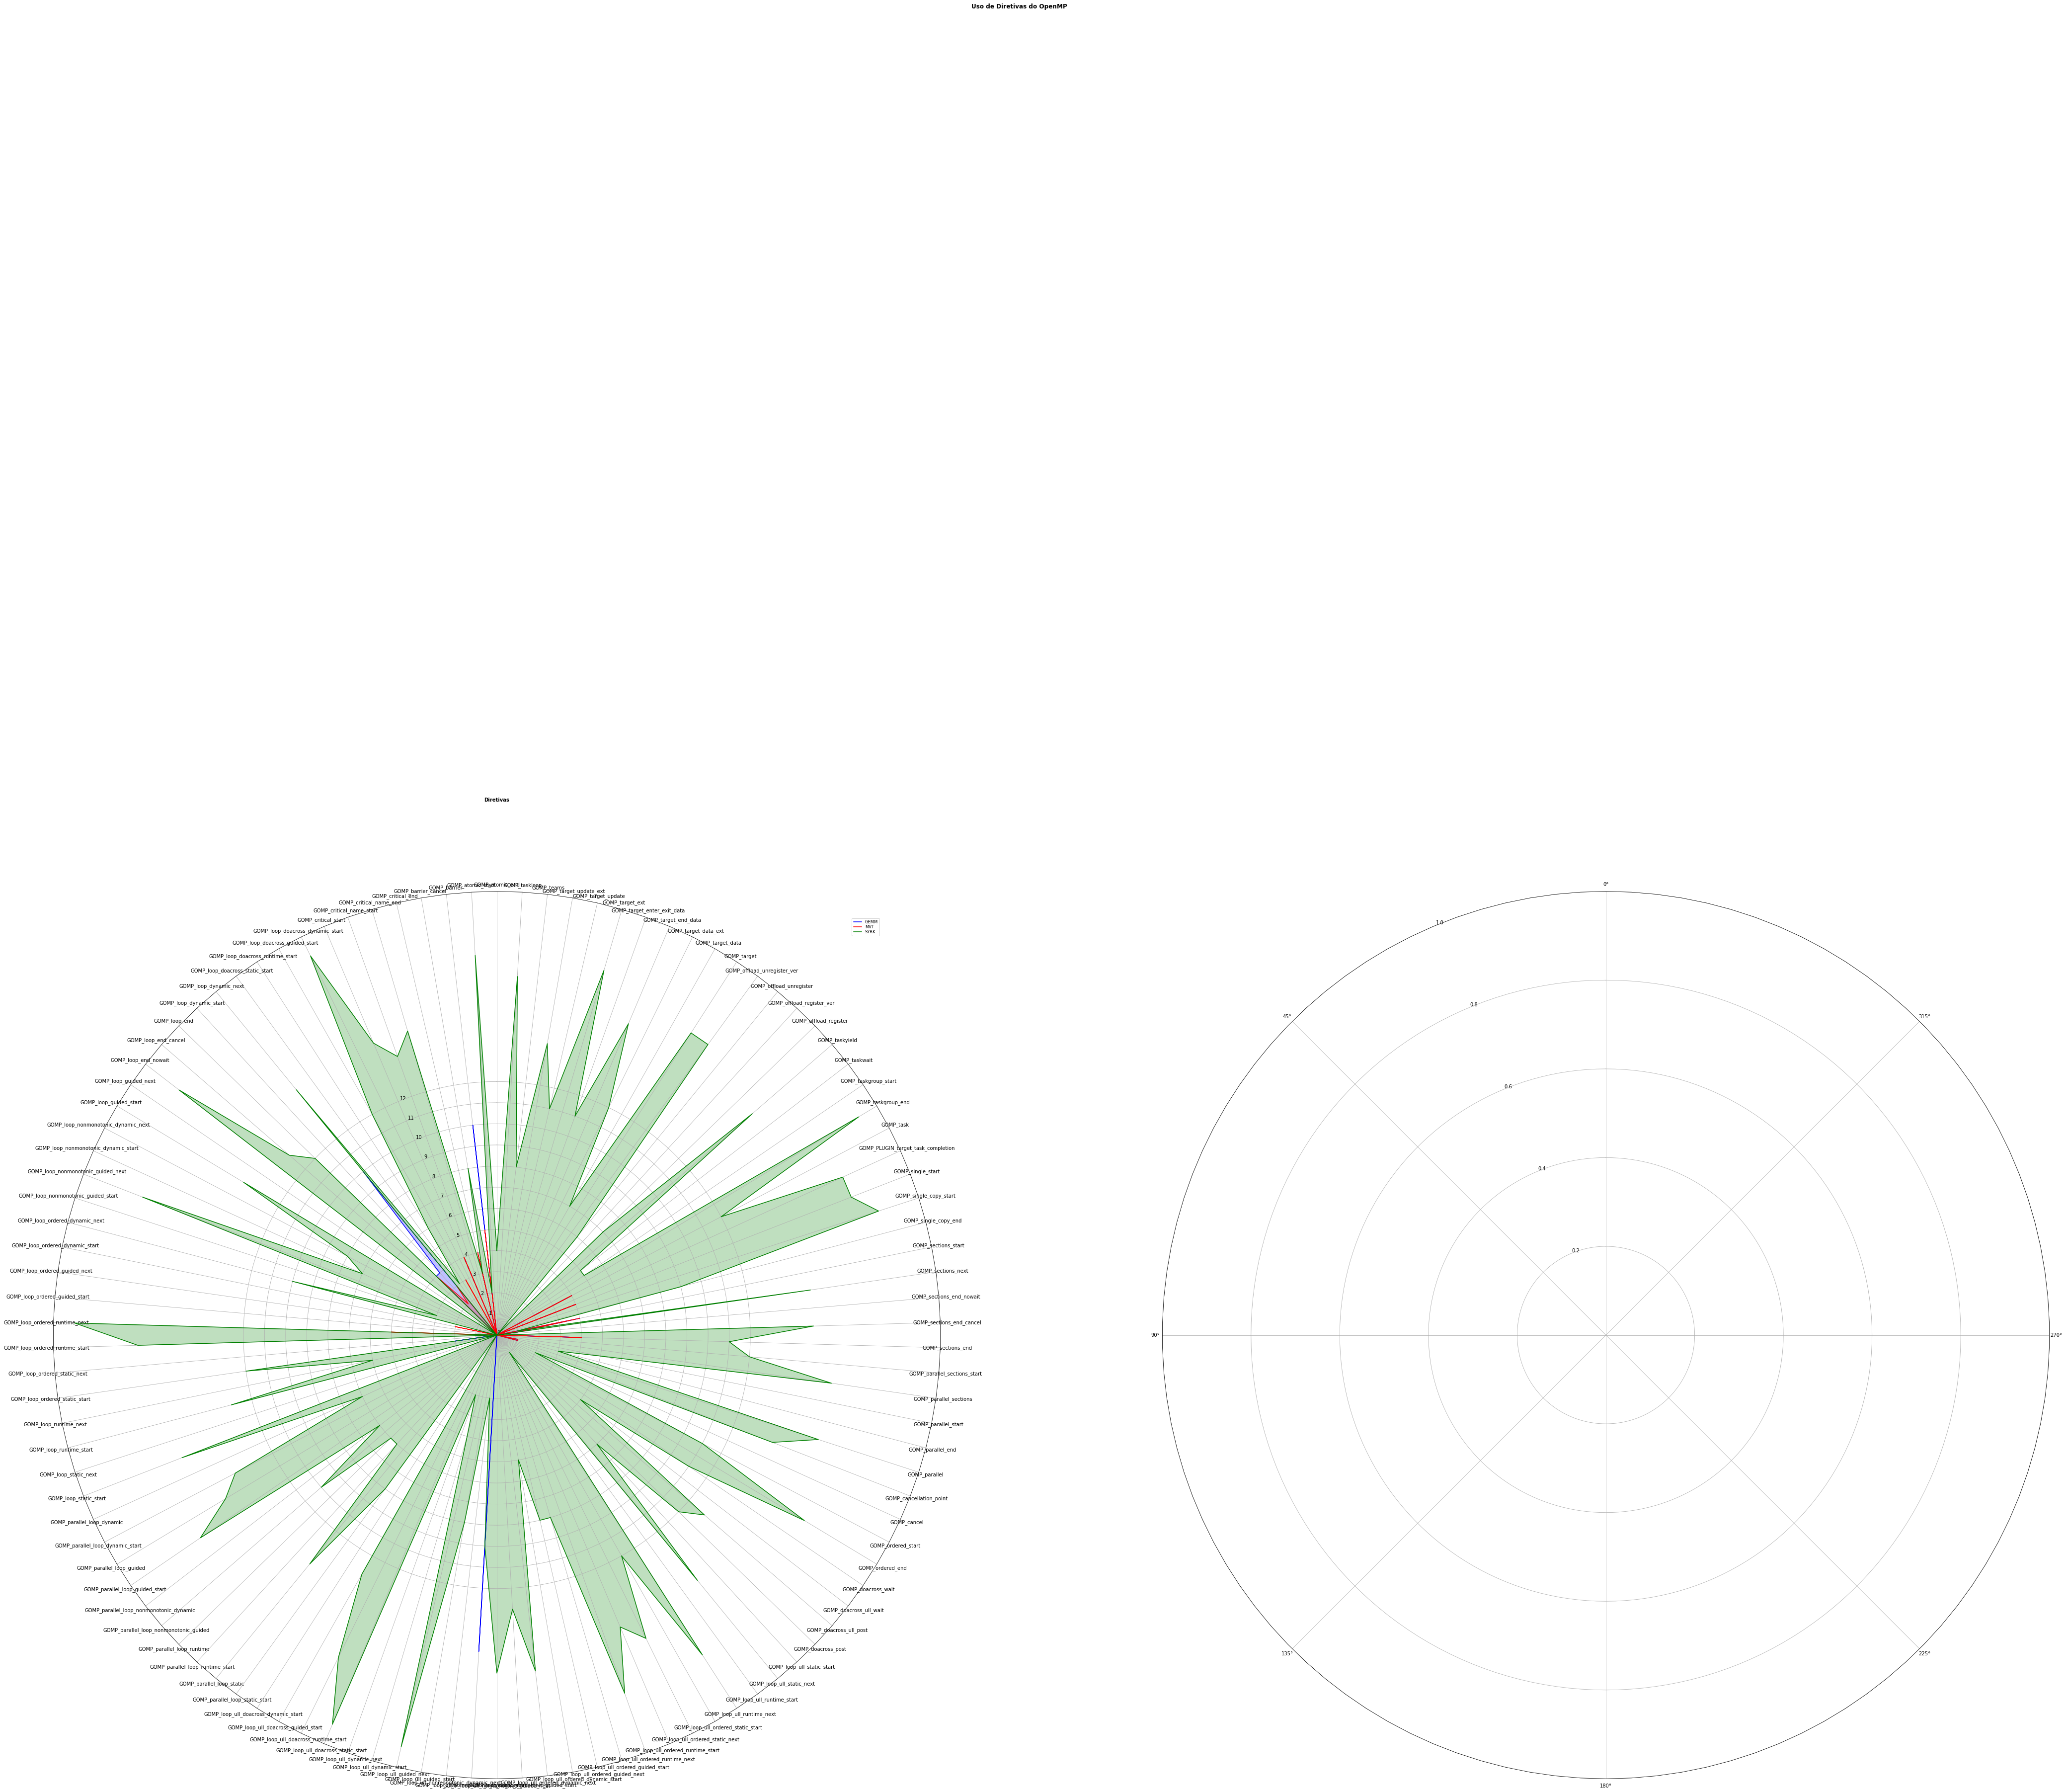

In [42]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
      ['GOMP_atomic_end', 'GOMP_atomic_start', 'GOMP_barrier', 'GOMP_barrier_cancel', 'GOMP_critical_end', 'GOMP_critical_name_end', 'GOMP_critical_name_start', 'GOMP_critical_start', 'GOMP_loop_doacross_dynamic_start', 'GOMP_loop_doacross_guided_start', 'GOMP_loop_doacross_runtime_start', 'GOMP_loop_doacross_static_start', 'GOMP_loop_dynamic_next', 'GOMP_loop_dynamic_start', 'GOMP_loop_end', 'GOMP_loop_end_cancel', 'GOMP_loop_end_nowait', 'GOMP_loop_guided_next', 'GOMP_loop_guided_start', 'GOMP_loop_nonmonotonic_dynamic_next', 'GOMP_loop_nonmonotonic_dynamic_start', 'GOMP_loop_nonmonotonic_guided_next', 'GOMP_loop_nonmonotonic_guided_start', 'GOMP_loop_ordered_dynamic_next', 'GOMP_loop_ordered_dynamic_start', 'GOMP_loop_ordered_guided_next', 'GOMP_loop_ordered_guided_start', 'GOMP_loop_ordered_runtime_next', 'GOMP_loop_ordered_runtime_start', 'GOMP_loop_ordered_static_next', 'GOMP_loop_ordered_static_start', 'GOMP_loop_runtime_next', 'GOMP_loop_runtime_start', 'GOMP_loop_static_next', 'GOMP_loop_static_start', 'GOMP_parallel_loop_dynamic', 'GOMP_parallel_loop_dynamic_start', 'GOMP_parallel_loop_guided', 'GOMP_parallel_loop_guided_start', 'GOMP_parallel_loop_nonmonotonic_dynamic', 'GOMP_parallel_loop_nonmonotonic_guided', 'GOMP_parallel_loop_runtime', 'GOMP_parallel_loop_runtime_start', 'GOMP_parallel_loop_static', 'GOMP_parallel_loop_static_start', 'GOMP_loop_ull_doacross_dynamic_start', 'GOMP_loop_ull_doacross_guided_start', 'GOMP_loop_ull_doacross_runtime_start', 'GOMP_loop_ull_doacross_static_start', 'GOMP_loop_ull_dynamic_next', 'GOMP_loop_ull_dynamic_start', 'GOMP_loop_ull_guided_next', 'GOMP_loop_ull_guided_start', 'GOMP_loop_ull_nonmonotonic_dynamic_next', 'GOMP_loop_ull_nonmonotonic_dynamic_start', 'GOMP_loop_ull_nonmonotonic_guided_next', 'GOMP_loop_ull_nonmonotonic_guided_start', 'GOMP_loop_ull_ordered_dynamic_next', 'GOMP_loop_ull_ordered_dynamic_start', 'GOMP_loop_ull_ordered_guided_next', 'GOMP_loop_ull_ordered_guided_start', 'GOMP_loop_ull_ordered_runtime_next', 'GOMP_loop_ull_ordered_runtime_start', 'GOMP_loop_ull_ordered_static_next', 'GOMP_loop_ull_ordered_static_start', 'GOMP_loop_ull_runtime_next', 'GOMP_loop_ull_runtime_start', 'GOMP_loop_ull_static_next', 'GOMP_loop_ull_static_start', 'GOMP_doacross_post', 'GOMP_doacross_ull_post', 'GOMP_doacross_ull_wait', 'GOMP_doacross_wait', 'GOMP_ordered_end', 'GOMP_ordered_start', 'GOMP_cancel', 'GOMP_cancellation_point', 'GOMP_parallel', 'GOMP_parallel_end', 'GOMP_parallel_start', 'GOMP_parallel_sections', 'GOMP_parallel_sections_start', 'GOMP_sections_end', 'GOMP_sections_end_cancel', 'GOMP_sections_end_nowait', 'GOMP_sections_next', 'GOMP_sections_start', 'GOMP_single_copy_end', 'GOMP_single_copy_start', 'GOMP_single_start', 'GOMP_PLUGIN_target_task_completion', 'GOMP_task', 'GOMP_taskgroup_end', 'GOMP_taskgroup_start', 'GOMP_taskwait', 'GOMP_taskyield', 'GOMP_offload_register', 'GOMP_offload_register_ver', 'GOMP_offload_unregister', 'GOMP_offload_unregister_ver', 'GOMP_target', 'GOMP_target_data', 'GOMP_target_data_ext', 'GOMP_target_end_data', 'GOMP_target_enter_exit_data', 'GOMP_target_ext', 'GOMP_target_update', 'GOMP_target_update_ext', 'GOMP_teams', 'GOMP_taskloop', 'GOACC_data_end', 'GOACC_data_start', 'GOACC_declare', 'GOACC_enter_exit_data', 'GOACC_get_num_threads', 'GOACC_get_thread_num', 'GOACC_parallel', 'GOACC_parallel_keyed', 'GOACC_update', 'GOACC_wait'],
      ('Diretivas', [
          [0, 0, 10, 0, 4, 0, 0, 4, 0, 0, 0, 0, 10, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 0, 1, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 5, 0, 4, 0, 0, 4, 0, 3, 0, 0, 3, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 0, 1, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [4,18,2,8,3,15,14,15,20,12,6,3,15,0,12,13,19,0,14,8,7,18,3,10,0,0,0,20,17,0,12,6,13,0,16,7,14,15,17,7,11,7,7,14,9,0,13,17,20,3,5,20,9,3,10,16,13,16,6,9,9,18,15,16,12,18,1,15,7,12,13,5,11,17,11,2,14,16,3,5,16,12,11,15,0,15,1,9,19,18,18,12,20,5,5,16,7,0,6,17,17,7,12,16,11,18,11,14,8,17]])
    ]
    return data


if __name__ == '__main__':
    N = 110
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(72, 72), nrows=1, ncols=2,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axs.flat, data):
        ax.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('GEMM', 'MVT', 'SYRK')
    legend = axs[0].legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, 'Uso de Diretivas do OpenMP',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()